# Plot the latent dynamics (goverened by the ODE)

Load data from the data/rot_mnist/rot_mnist.mat

In [4]:
import scipy.io as sio
import numpy as np
import torch
from torch.utils import data
import os
import matplotlib.pyplot as plt
from data.utils import Dataset

import torch
from torch.distributions import MultivariateNormal 
from model.core.flow import Flow
from model.core.svpy import SVGP_Layer
from model.core.flow import Flow
from model.core.vae import VAE  
from model.core.odegpvae import ODEGPVAE

In [5]:
device = 'cuda:0'

In [6]:
fullname = os.path.join('data', "rot_mnist", "rot-mnist.mat")
dataset = sio.loadmat(fullname)

X = np.squeeze(dataset['X'])
if True:
    Y = np.squeeze(dataset['Y'])
    X = X[Y==3,:,:]

N = 360
Nvalid = 40 + N
Ntest = 40 + Nvalid
T = 16
Xtr   = torch.tensor(X[:N],dtype=torch.float32).view([N,T,1,28,28])
Xvalid = torch.tensor(X[N:Nvalid],dtype=torch.float32).view([-1,T,1,28,28])
Xtest = torch.tensor(X[Nvalid:Ntest],dtype=torch.float32).view([-1,T,1,28,28])

# Generators
params = {'batch_size': 20, 'shuffle': True, 'num_workers': 2} #25
trainset = Dataset(Xtr)
trainset = data.DataLoader(trainset, **params)
validset  = Dataset(Xvalid)
validset  = data.DataLoader(validset, **params)
testset  = Dataset(Xtest)
testset  = data.DataLoader(testset, **params)



Initialize models

In [7]:
odegpvae_ode1_vae = ODEGPVAE(flow=Flow(diffeq=SVGP_Layer(D_in=6, D_out=6, M=100, S=256,dimwise=True, q_diag=False, device=device, kernel='RBF'), solver='euler', use_adjoint=False, order=1),
                        vae= VAE(frames = 5, n_filt=8, latent_dim=6, order= 1, device=device, distribution='bernoulli'),
                        num_observations= N,
                        order = 1,
                        steps=5)

odegpvae_ode1 = ODEGPVAE(flow=Flow(diffeq=SVGP_Layer(D_in=6, D_out=6, M=100, S=256,dimwise=True, q_diag=False, device=device, kernel='RBF'), solver='euler', use_adjoint=False, order=1),
                        vae= VAE(frames = 5, n_filt=8, latent_dim=6, order= 1, device=device, distribution='bernoulli'),
                        num_observations= N,
                        order = 1,
                        steps=5)

odegpvae_ode2 = ODEGPVAE(flow=Flow(diffeq=SVGP_Layer(D_in=6, D_out=3, M=100, S=256,dimwise=True, q_diag=False, device=device, kernel='RBF'), solver='euler', use_adjoint=False, order=2),
                        vae= VAE(frames = 5, n_filt=8, latent_dim=3, order= 2, device=device, distribution='bernoulli'),
                        num_observations= N,
                        order = 2,
                        steps=5)

odegpvae_ode1_rbf = ODEGPVAE(flow=Flow(diffeq=SVGP_Layer(D_in=6, D_out=6, M=100, S=256,dimwise=True, q_diag=False, device=device, kernel='RBF'), solver='euler', use_adjoint=False, order=1),
                        vae= VAE(frames = 5, n_filt=8, latent_dim=6, order= 1, device=device, distribution='bernoulli'),
                        num_observations= N,
                        order = 1,
                        steps=5)

odegpvae_ode1_df = ODEGPVAE(flow=Flow(diffeq=SVGP_Layer(D_in=6, D_out=6, M=100, S=256,dimwise=True, q_diag=False, device=device, kernel='DF'), solver='euler', use_adjoint=False, order=1),
                        vae= VAE(frames = 5, n_filt=8, latent_dim=6, order= 1, device=device, distribution='bernoulli'),
                        num_observations= N,
                        order = 1,
                        steps=5)
odegpvae_ode1_df_best = ODEGPVAE(flow=Flow(diffeq=SVGP_Layer(D_in=6, D_out=6, M=100, S=256,dimwise=True, q_diag=False, device=device, kernel='DF'), solver='euler', use_adjoint=False, order=1),
                        vae= VAE(frames = 5, n_filt=8, latent_dim=6, order= 1, device=device, distribution='bernoulli'),
                        num_observations= N,
                        order = 1,
                        steps=5)

odegpvae_ode1_df_best_10k = ODEGPVAE(flow=Flow(diffeq=SVGP_Layer(D_in=6, D_out=6, M=100, S=256,dimwise=True, q_diag=False, device=device, kernel='DF'), solver='euler', use_adjoint=False, order=1),
                        vae= VAE(frames = 5, n_filt=8, latent_dim=6, order= 1, device=device, distribution='bernoulli'),
                        num_observations= N,
                        order = 1,
                        steps=5)

load models

In [8]:
odegpvae_ode1_vae.to(device)
fname = 'results/mnist_01_11_2022-11:55/odegpvae_mnist.pth'
odegpvae_ode1_vae.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae_ode1_vae.eval()

odegpvae_ode1.to(device)
fname = 'results/mnist_03_11_2022-10:16/odegpvae_mnist.pth'
odegpvae_ode1.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae_ode1.eval()

odegpvae_ode2.to(device)
fname = 'results/mnist_03_11_2022-10:13/odegpvae_mnist.pth'
odegpvae_ode2.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae_ode2.eval()

odegpvae_ode1_rbf.to(device)
fname = 'results/mnist_31_10_2022-13:25/odegpvae_mnist.pth'
odegpvae_ode1_rbf.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae_ode1_rbf.eval()

odegpvae_ode1_df_best.to(device)
fname = 'results/mnist_31_10_2022-13:28/odegpvae_mnist.pth'
odegpvae_ode1_df_best.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae_ode1_df_best.eval()

odegpvae_ode1_df_best_10k.to(device)
fname = 'results/mnist_01_11_2022-11:59/odegpvae_mnist.pth'
odegpvae_ode1_df_best_10k.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae_ode1_df_best_10k.eval()

odegpvae_ode1_df.to(device)
fname = 'results/mnist_03_11_2022-10:25/odegpvae_mnist.pth'
odegpvae_ode1_df.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae_ode1_df.eval()

ODEGPVAE(
  (flow): Flow(
    (odefunc): ODEfunc(
      (diffeq): SVGP_Layer(
        (kern): DivergenceFreeKernel()
        (inducing_loc): Inducing locations parameter with Identity transformation
        (Um): Inducing distribution (mean) parameter with Identity transformation
        (Us_sqrt): Inducing distribution (scale) parameter with Lower cholesky transformation
      )
    )
  )
  (vae): VAE(
    (encoder): Encoder(
      (cnn): Sequential(
        (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(8, 16, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU()
        (6): Conv2d(16, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        (7): ReLU()
        (8): Flatten()
      )
      (fc1): Linear(in_features=51

Sample images from test data 

In [9]:
images_n = 3
images_latent = 20

In [10]:

test_batch = next(iter(testset))[:images_n,:].to(device) #sample 3 images'
test_latent = next(iter(testset))[:images_latent,:].to(device)

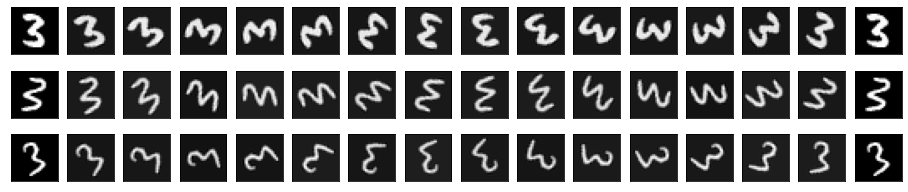

In [11]:
plt.figure(1,(20,8))
for j in range(3):
    for i in range(16):
        plt.subplot(7,20,j*20+i+1)
        plt.imshow(np.reshape(test_batch[j,i,:].cpu(),[28,28]), cmap='gray');
        plt.xticks([]); plt.yticks([])
plt.show()

In [12]:
#from cgi import test
from model.misc.plot_utils import plot_latent_state, plot_rollout, plot_latent_velocity, plot_rot_mnist
def compute_mse_std(model, data, L=1):
    with torch.no_grad():
        se_all = []
        for itr_test,test_batch in enumerate(data):
            test_batch = test_batch.to(device)
            [N,T,nc,d,d] = test_batch.shape

            #encode
            s0_mu, s0_logv = model.vae.encoder(test_batch[:,0]) #N,q
            z0 = model.vae.encoder.sample(mu = s0_mu, logvar = s0_logv)
            v0_mu, v0_logv = None, None
            if model.order == 2:
                v0_mu, v0_logv = model.vae.encoder_v(torch.squeeze(test_batch[:,0:model.v_steps]))
                v0 = model.vae.encoder_v.sample(mu= v0_mu, logvar = v0_logv)
                z0 = torch.concat([z0,v0],dim=1) #N, 2q
            q = z0.shape[1]//2

            #sample flow
            ztL = model.sample_trajectories(z0,T,L) # L,N,T,2q

            #decode
            Xrec = model.build_decoding(ztL, (L,N,T,nc,d,d))

            se = (Xrec-test_batch)**2
            se_all.append(se)
        se_all = torch.stack(se_all)

        mse = torch.mean(se_all)
        std = torch.std(se_all)
        return mse, std

def plot_latent_dynamics(model, data, fname, scale=1):
    [N,T,nc,d,d] = data.shape
    s0_mu, s0_logv = model.vae.encoder(data[:,0]) #N,q
    z0 = model.vae.encoder.sample(mu = s0_mu, logvar = s0_logv)
    v0_mu, v0_logv = None, None
    if model.order == 2:
        v0_mu, v0_logv = model.vae.encoder_v(torch.squeeze(data[:,0:model.v_steps]))
        v0 = model.vae.encoder_v.sample(mu= v0_mu, logvar = v0_logv)
        z0 = torch.concat([z0,v0],dim=1) #N, 2q
    zt = model.sample_trajectories(z0,scale*T).squeeze(0) # N,T,2q
    if model.order == 1:
        plot_latent_state(zt, show=True, fname=fname)
    elif model.order ==2:
        st_mu = zt[:,:,:model.vae.latent_dim] # N,T,q
        vt_mu = zt[:,:,model.vae.latent_dim:] # N,T,q
        plot_latent_state(st_mu, show=True, fname=fname)
        plot_latent_velocity(vt_mu, show=True, fname=fname)

def plot_rot_mnist(X, Xrec, show=False, fname='rot_mnist.png', N=None, scale=2):
    if N is None:
        N = min(X.shape[0],10)
    Xnp = X.detach().cpu().numpy()
    Xrecnp = Xrec.detach().cpu().numpy()
    T = X.shape[1]
    if scale==1:
        plt.figure(2,(T,3*N))
    elif scale==2:
        plt.figure(2,(T,N))
    for i in range(N):
        for t in range(T):
            plt.subplot(2*N,scale*T,i*T*scale*2+t+1)
            plt.imshow(np.reshape(Xnp[i,t],[28,28]), cmap='gray')
            plt.xticks([]); plt.yticks([])
        for t in range(scale*T):
            plt.subplot(2*N,T*scale,i*T*scale*2+t+T*scale+1)
            plt.imshow(np.reshape(Xrecnp[i,t],[28,28]), cmap='gray')
            plt.xticks([]); plt.yticks([])
    if show:
        plt.show()
    else:
        plt.savefig(fname)
        plt.close()

## Pretrained VAE + GP-ODE

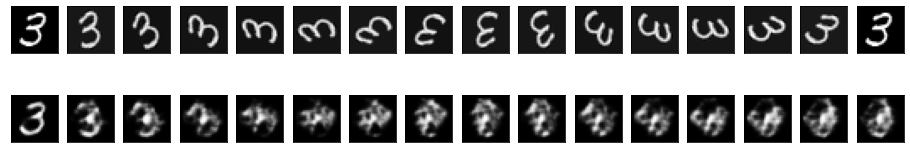

In [133]:
rollout=1
with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_vae(test_batch,  T_custom=rollout*T)
    plot_rot_mnist(test_batch, Xrec_mu.squeeze(0), show=True, fname='rot_mnist.png', N=1, scale=rollout)

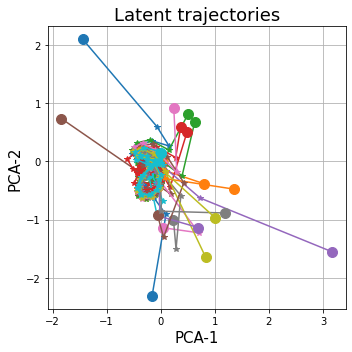

In [48]:
plot_latent_dynamics(odegpvae_ode1_vae, test_latent, 'latent_rollout.png', scale=2)

In [29]:
mse, std = compute_mse_std(odegpvae_ode1_vae, testset, L=5)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.05951222404837608
std 0.13532660901546478


## First vs Second Order ODE 

### First Order

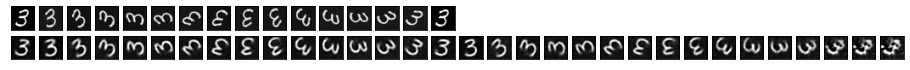

In [134]:
rollout=2
with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1(test_batch,  T_custom=rollout*T)
    plot_rot_mnist(test_batch, Xrec_mu.squeeze(0), show=True, fname='rot_mnist.png', N=1, scale=rollout)

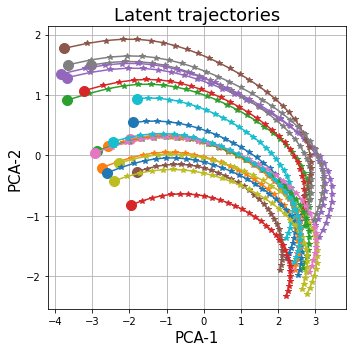

In [135]:
plot_latent_dynamics(odegpvae_ode1, test_latent, 'latent_rollout.png', scale=rollout)

In [35]:
mse, std = compute_mse_std(odegpvae_ode1, testset)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.047477271407842636
std 0.13357104361057281


### Second Order

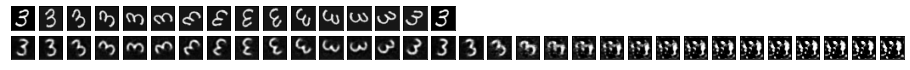

In [136]:
rollout=2
with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode2(test_batch,  T_custom=rollout*T)
    plot_rot_mnist(test_batch, Xrec_mu.squeeze(0), show=True, fname='rot_mnist.png', N=1, scale=rollout)

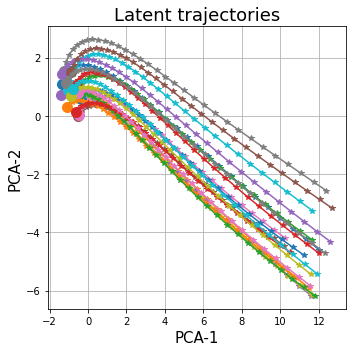

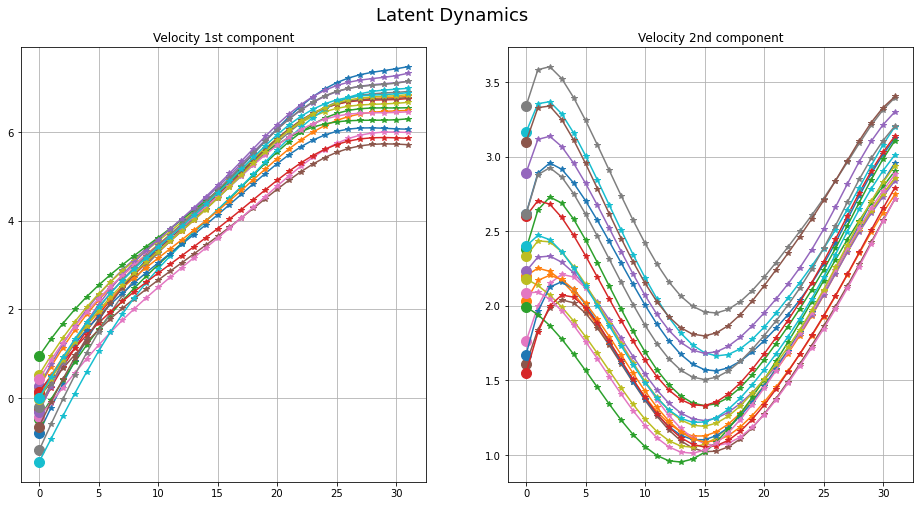

In [137]:
plot_latent_dynamics(odegpvae_ode2, test_latent, 'latent_rollout.png', scale=rollout)

In [39]:
mse, std = compute_mse_std(odegpvae_ode2, testset)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.040623441338539124
std 0.11545435339212418


## RBF vs Divergence-Free Kernel

RBF

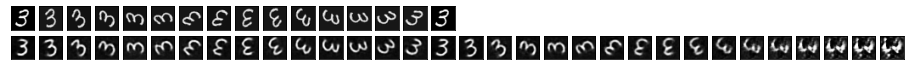

In [138]:
rollout=2
with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_rbf(test_batch,  T_custom=rollout*T)
    plot_rot_mnist(test_batch, Xrec_mu.squeeze(0), show=True, fname='rot_mnist.png', N=1, scale=rollout)

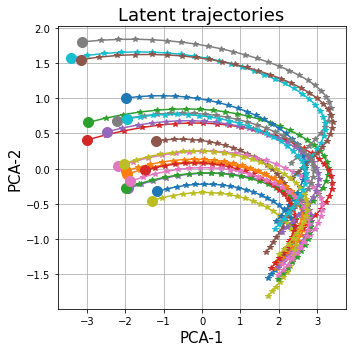

In [139]:
plot_latent_dynamics(odegpvae_ode1_rbf, test_latent, 'latent_rollout.png', scale=rollout)

In [140]:
mse, std = compute_mse_std(odegpvae_ode1_rbf, testset)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.040260303765535355
std 0.11979104578495026


DF

best (the same initialization settings and training as rbf above)

/home/ilze/PhD/OdeVaeGP/experiments/model/core/kernels.py:385: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2304.)
  nu = torch.triangular_solve(u_prior.reshape(Ku.shape[0])[:,None], Lu, upper=False)[0]  # MD,1


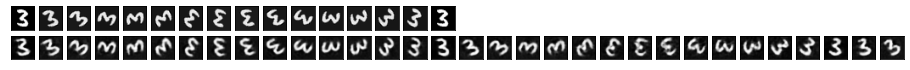

In [13]:
rollout=2
with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_df_best(test_batch,  T_custom=rollout*T)
    plot_rot_mnist(test_batch, Xrec_mu.squeeze(0), show=True, fname='rot_mnist.png', N=1, scale=rollout)

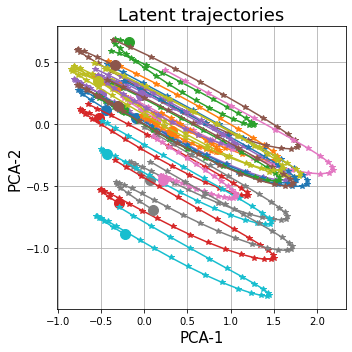

In [14]:
plot_latent_dynamics(odegpvae_ode1_df_best, test_latent, 'latent_rollout.png', scale=rollout)

In [15]:
mse, std = compute_mse_std(odegpvae_ode1_df_best, testset)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.034475281834602356
std 0.10382966697216034


# Ablation Studies

### DF same setting but 10'000 epochs 

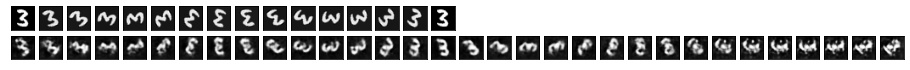

In [16]:
rollout=2
with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_df_best_10k(test_batch,  T_custom=rollout*T)
    plot_rot_mnist(test_batch, Xrec_mu.squeeze(0), show=True, fname='rot_mnist.png', N=1, scale=rollout)

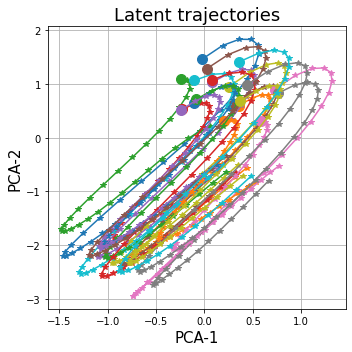

In [17]:
plot_latent_dynamics(odegpvae_ode1_df_best_10k, test_latent, 'latent_rollout.png', scale=rollout)

In [18]:
mse, std = compute_mse_std(odegpvae_ode1_df_best_10k, testset)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.042116280645132065
std 0.12217656522989273


## DF with different initialization 

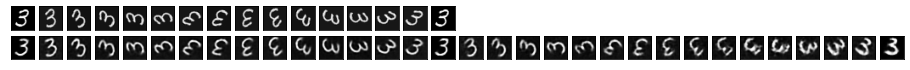

In [143]:
rollout=2
with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_df(test_batch,  T_custom=rollout*T)
    plot_rot_mnist(test_batch, Xrec_mu.squeeze(0), show=True, fname='rot_mnist.png', N=1, scale=rollout)

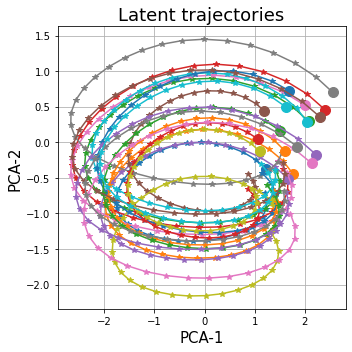

In [144]:
plot_latent_dynamics(odegpvae_ode1_df, test_latent, 'latent_rollout.png', scale=rollout)

In [81]:
mse, std = compute_mse_std(odegpvae_ode1_df, testset)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.042561132460832596
std 0.12462931126356125


### DF with Fixed Initial Angle

In [82]:
odegpvae_ode1_df_fixed = ODEGPVAE(flow=Flow(diffeq=SVGP_Layer(D_in=6, D_out=6, M=100, S=256,dimwise=True, q_diag=False, device=device, kernel='DF'), solver='euler', use_adjoint=False, order=1),
                        vae= VAE(frames = 5, n_filt=8, latent_dim=6, order= 1, device=device, distribution='bernoulli'),
                        num_observations= N,
                        order = 1,
                        steps=5)

In [ ]:
odegpvae_ode1_df_fixed.to(device)
fname = 'results/mnist_31_10_2022-13:32/odegpvae_mnist.pth'
odegpvae_ode1_df_fixed.load_state_dict(torch.load(fname,map_location=torch.device(device)))
odegpvae_ode1_df_fixed.eval()

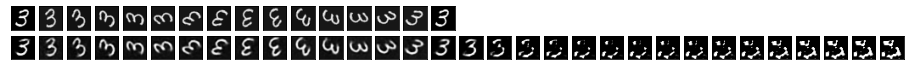

In [145]:
rollout=2
with torch.no_grad():    
    Xrec_mu, _, _  = odegpvae_ode1_df_fixed(test_batch,  T_custom=rollout*T)
    plot_rot_mnist(test_batch, Xrec_mu.squeeze(0), show=True, fname='rot_mnist.png', N=1, scale=rollout)

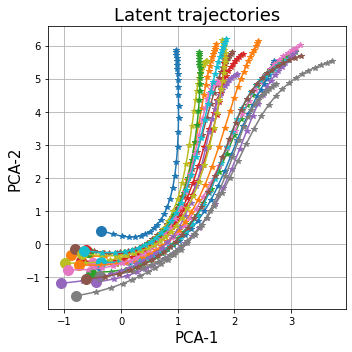

In [147]:
plot_latent_dynamics(odegpvae_ode1_df_fixed, test_latent, 'latent_rollout.png', scale=rollout)

In [97]:
mse, std = compute_mse_std(odegpvae_ode1_df_fixed, testset)
print('mse {}'.format(mse))
print('std {}'.format(std))

mse 0.02194780297577381
std 0.07690300792455673
